# Neural Network Assignment

## Dataset - forestfires

## Problem Statement - PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

# Importing necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

### Load & Understand the data set

In [2]:
data = pd.read_csv("forestfires.csv")

In [3]:
data[:5]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
data.shape

(517, 31)

In [5]:
data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

# Check and drop the duplicate values

In [7]:
data[data.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [8]:
data[data.duplicated()].shape

(8, 31)

In [9]:
#drop the duplicate value
data1 = data.drop_duplicates()

In [10]:
data1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [11]:
data1.shape

(509, 31)

In [12]:
data2 = data1.drop(data1.columns[10:30], axis = 1 )

In [13]:
data2.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,small


In [14]:
data2.shape

(509, 11)

In [15]:
# Convert the categoricalvalues of size_category columns to ingeter
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
data2["size_category"]=label_encoder.fit_transform(data2["size_category"])

In [16]:
data2.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,1


In [17]:
# Coverting catergorical values of days and months into the integers
data2.month.replace(("jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"),(1,2,3,4,5,6,7,8,9,10,11,12), inplace = True )
data2.day.replace(("mon","tue","wed","thu","fri","sat","sun"),(1,2,3,4,5,6,7), inplace = True )

In [18]:
data2.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,1
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,1
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,1


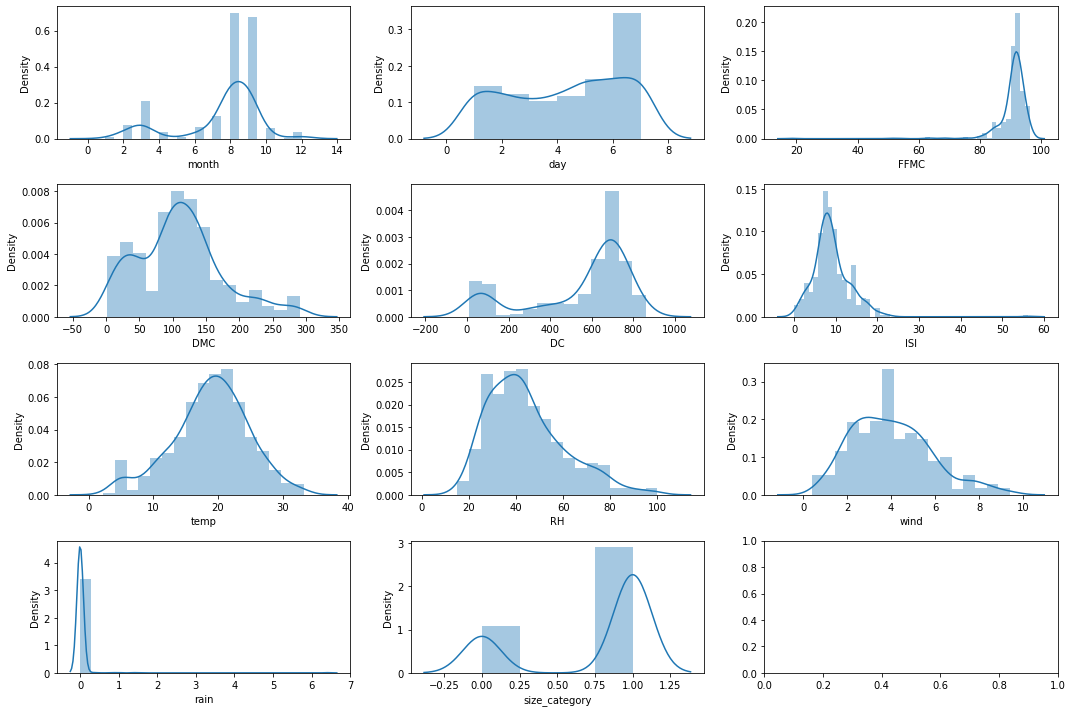

In [19]:
# Visualization using distplot
import warnings
warnings.filterwarnings("ignore")
fig, ax = plt.subplots(4, 3, figsize=(15,10))
sns.distplot(data2.month, ax=ax[0,0])
sns.distplot(data2.day, ax=ax[0,1])
sns.distplot(data2.FFMC, ax=ax[0,2])
sns.distplot(data2.DMC, ax=ax[1,0])
sns.distplot(data2.DC, ax=ax[1,1])
sns.distplot(data2.ISI, ax=ax[1,2])
sns.distplot(data2.temp, ax=ax[2,0])
sns.distplot(data2.RH, ax=ax[2,1])
sns.distplot(data2.wind, ax=ax[2,2])
sns.distplot(data2.rain, ax=ax[3,0])
sns.distplot(data2["size_category"], ax=ax[3,1])

plt.tight_layout()
plt.show()

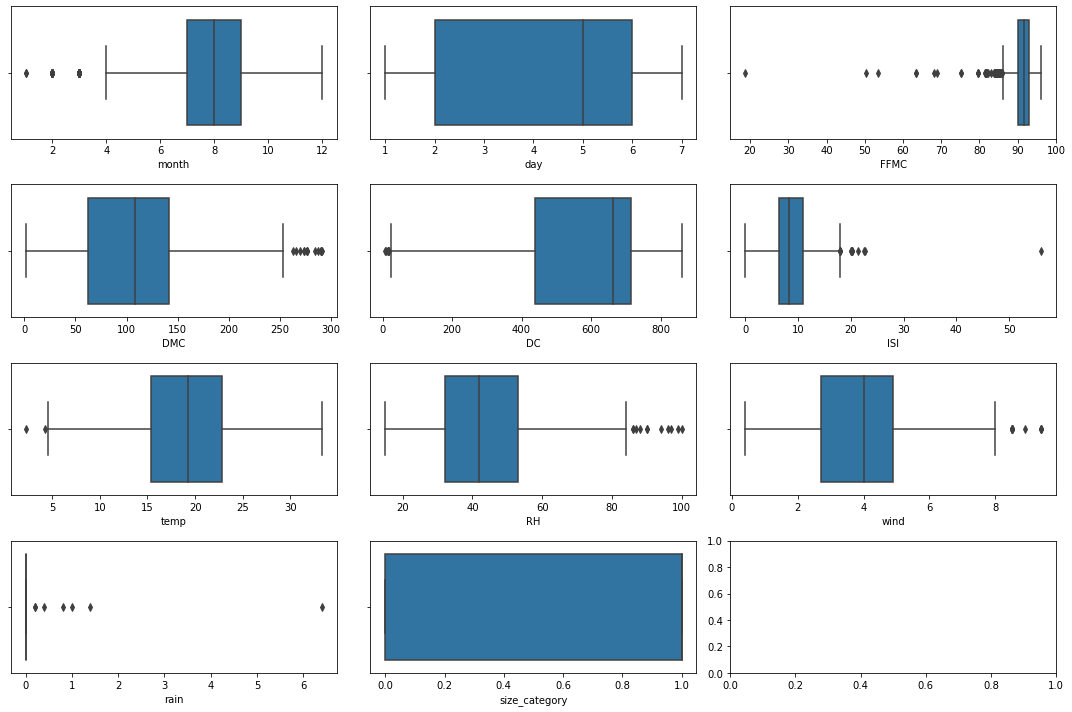

In [20]:
# Checking of outliers
fig, ax = plt.subplots(4, 3, figsize=(15,10))
sns.boxplot(data2.month, ax=ax[0,0])
sns.boxplot(data2.day, ax=ax[0,1])
sns.boxplot(data2.FFMC, ax=ax[0,2])
sns.boxplot(data2.DMC, ax=ax[1,0])
sns.boxplot(data2.DC, ax=ax[1,1])
sns.boxplot(data2.ISI, ax=ax[1,2])
sns.boxplot(data2.temp, ax=ax[2,0])
sns.boxplot(data2.RH, ax=ax[2,1])
sns.boxplot(data2.wind, ax=ax[2,2])
sns.boxplot(data2.rain, ax=ax[3,0])
sns.boxplot(data2["size_category"], ax=ax[3,1])

plt.tight_layout()
plt.show()

### Extracting the independent and dependent variables

In [21]:
X = data2.iloc[:,0:10].values
Y = data2.iloc[:,-1].values

In [22]:
X

array([[ 3. ,  5. , 86.2, ..., 51. ,  6.7,  0. ],
       [10. ,  2. , 90.6, ..., 33. ,  0.9,  0. ],
       [10. ,  6. , 90.6, ..., 33. ,  1.3,  0. ],
       ...,
       [ 8. ,  7. , 81.6, ..., 70. ,  6.7,  0. ],
       [ 8. ,  6. , 94.4, ..., 42. ,  4. ,  0. ],
       [11. ,  2. , 79.5, ..., 31. ,  4.5,  0. ]])

In [23]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [24]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [25]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=10, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='linear'))

In [26]:
# Compile model
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [27]:
# Fit the model
model.fit(X, Y, validation_split=0.33, epochs=100, batch_size=10)

Epoch 1/100
35/35 [==============================] - 1s 23ms/step - loss: 0.4766 - accuracy: 0.3697 - val_loss: 0.2790 - val_accuracy: 0.6012
Epoch 2/100
35/35 [==============================] - 0s 2ms/step - loss: 0.2367 - accuracy: 0.6294 - val_loss: 0.2391 - val_accuracy: 0.6012
Epoch 3/100
35/35 [==============================] - 0s 2ms/step - loss: 0.2278 - accuracy: 0.6353 - val_loss: 0.2450 - val_accuracy: 0.6726
Epoch 4/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1863 - accuracy: 0.7678 - val_loss: 0.2571 - val_accuracy: 0.6726
Epoch 5/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1772 - accuracy: 0.7805 - val_loss: 0.2532 - val_accuracy: 0.6726
Epoch 6/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1733 - accuracy: 0.7831 - val_loss: 0.2358 - val_accuracy: 0.6726
Epoch 7/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1936 - accuracy: 0.7429 - val_loss: 0.2382 - val_accuracy: 0.6726
Epoch 8/100


In [28]:
# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

16/16 [==============================] - 0s 798us/step - loss: 0.1966 - accuracy: 0.7387
accuracy: 73.87%


In [29]:
history = model.fit(X, Y, validation_split=0.33, epochs=100, batch_size=10)

Epoch 1/100
35/35 [==============================] - 0s 3ms/step - loss: 0.1776 - accuracy: 0.7713 - val_loss: 0.2295 - val_accuracy: 0.6726
Epoch 2/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1755 - accuracy: 0.7713 - val_loss: 0.3146 - val_accuracy: 0.6726
Epoch 3/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1883 - accuracy: 0.7683 - val_loss: 0.2478 - val_accuracy: 0.6726
Epoch 4/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1808 - accuracy: 0.7713 - val_loss: 0.2362 - val_accuracy: 0.6726
Epoch 5/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1794 - accuracy: 0.7713 - val_loss: 0.2356 - val_accuracy: 0.6726
Epoch 6/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1768 - accuracy: 0.7713 - val_loss: 0.2802 - val_accuracy: 0.6726
Epoch 7/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1797 - accuracy: 0.7713 - val_loss: 0.2342 - val_accuracy: 0.6726
Epoch 8/100
3

In [30]:
# Visualize training history

# list all data in history
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

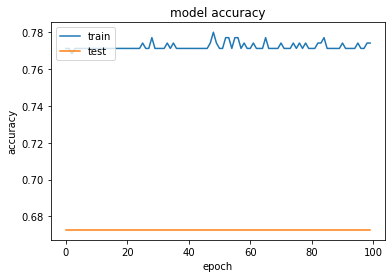

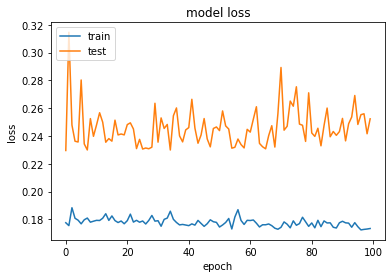

In [31]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


#### Tuning of Hyperparameters :- Batch Size and Epochs

In [32]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

In [33]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=10, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='linear'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='mse', optimizer=adam, metrics=['accuracy'])
    return model

In [34]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............ batch_size=10, epochs=10, score=1.000, total=   0.6s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.765, total=   0.6s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.510, total=   0.7s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.8s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.676, total=   0.8s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.6s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.693, total=   0.6s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.2s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=1.000, total=   1.2s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.5s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.765, total=   1.2s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    5.7s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.510, total=   1.4s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    7.0s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.676, total=   1.2s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    8.2s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.693, total=   1.2s
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=1.000, total=   1.9s
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=0.765, total=   2.0s
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=0.510, total=   2.1s
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=0.676, total=   2.0s
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=0.693, total=   2.0s
[CV] batch_size=20, epochs=10 ........................................
[CV] ............ batch_size=20, epochs=10, score=1.000, total=   0.6s
[CV] batch_size=20, epochs=10 ........................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   46.2s finished
